# PROBLEM SET 5
Sophie Sun

EXERCISE 1

In [1]:
# load packages
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy
from scipy import stats
import scipy.stats as sts
from scipy import optimize as opt
from scipy import integrate
from scipy.stats import norm
import pandas as pd

Mean: 720.2779753272437
Median: 172.21
Max: 227967.25
Min: 0.01
Sd: 3972.663756393663


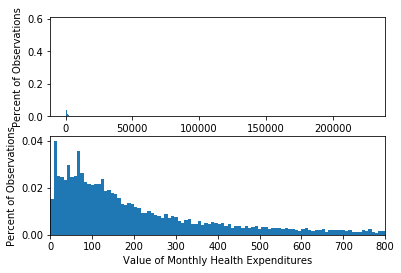

The second histogram is much easier to interpret because it doesn't include the outliers that are present in the first histogram.


In [2]:
# PART A
# load health claims data
data = np.loadtxt("clms.txt")
# mean, median, max, min, and sd
mean, med, data_max, data_min, sd = data.mean(), np.median(data), data.max(), data.min(), data.std()
print(f"Mean: {mean}\nMedian: {med}\nMax: {data_max}\nMin: {data_min}\nSd: {sd}")
# plot histograms of data
weights = (1 / data.shape[0]) * np.ones_like(data)
plt.subplot(2, 1, 1)
# first histogram with 1000 bins
plt.hist(data, bins = 1000, weights = weights)
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylabel("Percent of Observations")
plt.subplot(2, 1, 2)
# second histogram with 100 bins
plt.hist(data, bins = 100, range = (0, 800), weights = weights)
plt.xlim(0, 800)
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylabel("Percent of Observations")
plt.show()
print("The second histogram is much easier to interpret because it doesn't include the outliers that are present in the first histogram.")

α: 0.22175531882397229
β: 21911.06469927622
L(θ): -82076.451605665


/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


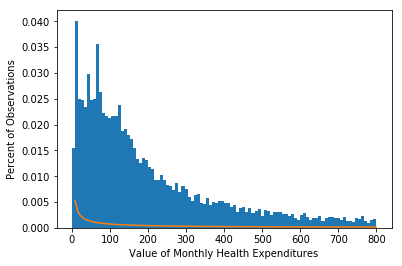

In [3]:
# PART B
# set parameters
β_0 = data.var() / data.mean()
α_0 = data.mean() / β_0
p_0 = np.array([α_0, β_0])
# function that calculates the gamma pdf
def gamma(x, α, β): 
    return (1 / ((β ** α) * math.gamma(α))) * (x ** (α - 1)) * (np.exp(-(x / β)))
# function that calculates the log likelihood of the gamma pdf
def l_gamma(x, α, β):
    result = gamma(x, α, β)
    l_values = (np.log(result)).sum()
    return l_values
# function that minimizes the negative log likelihood
def l_min(params, *args):
    α, β = params
    x = args
    return -l_gamma(x, α, β)
# estimated values for α, β, and max log likelihood function
results = opt.minimize(l_min, p_0, args = data, method ='L-BFGS-B', bounds = ((0, None), (0, None)))
α, β = results.x
L = -results.fun
print(f"α: {α}\nβ: {β}\nL(θ): {L}")
# plot second histogram overlayed with line from gamma pdf
plt.hist(data, bins = 100, range = (0, 800), weights = weights)
x = np.linspace(0, 800, 100)
plt.plot(x, gamma(x, α, β))
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylabel("Percent of Observations")
plt.show()

α: 0.2217538681829344
β: 21911.064372887282
m: 0.9976836233858909
L(θ): -82076.44646382454


/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


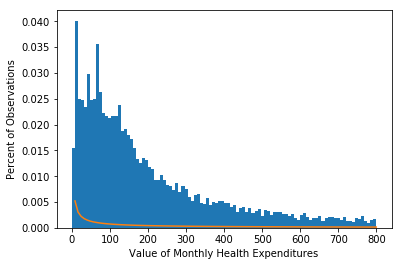

In [4]:
# PART C
# set parameters
m_0 = 1
p_0 = np.array([α_0, β_0, m_0])
# function that calculates the generalized gamma pdf
def g_gamma(x, α, β, m): 
    return (m /((β ** α) * math.gamma(α / m))) * (x ** (α - 1)) * (np.exp(-(x / β) ** m))
# function that calculates the generalized log likelihood of the gamma pdf
def lg_gamma(x, α, β, m):
    result = g_gamma(x, α, β, m)
    l_values = (np.log(result)).sum()
    return l_values
# function that minimizes the generalized negative log likelihood
def lg_min(params, *args):
    α, β, m = params
    x = args
    return -lg_gamma(x, α, β, m)
# estimated values for generalized α, β, and max log likelihood function
results = opt.minimize(lg_min, p_0, args = data, method ='L-BFGS-B', bounds = ((0, None), (0, None), (0, None)))
α_g, β_g, m_g = results.x
L = -results.fun
print(f"α: {α_g}\nβ: {β_g}\nm: {m_g}\nL(θ): {L}")
# second histogram overlayed with line from generalized gamma pdf
plt.hist(data, bins = 100, range = (0, 800), weights = weights)
x = np.linspace(0, 800, 100)
plt.plot(x, g_gamma(x, α_g, β_g, m_g))
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylabel("Percent of Observations")
plt.show()

a: 0.10162568229319886
b: 4382212.934938698
p: 58.25349909334069
q: 161.20817942443998
L(θ): -74874.56251803393


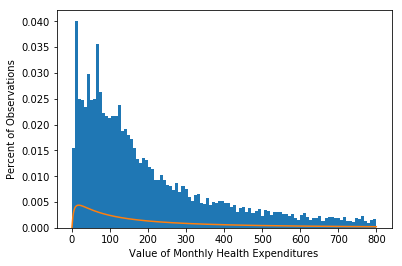

In [5]:
# set parameters
a_0 = m_0
b_0 = β_0 * 200 ** (1 / m_0)
p_0 = α_0 / β_0
q_0 = 200
# function that calculates the generalized beta 2 pdf
def g_beta(x, a, b, p, q): 
    return (a * x ** (a * p - 1)) / (b**(a*p)* scipy.special.beta(p, q)*(1 + (x/b)**a)**(p+q))
# function that calculates the generalized log likelihood of the beta 2 pdf
def l_beta(x, a, b, p, q):
    '''Get me the log likelihood'''
    result = g_beta(x, a, b, p, q)
    l_values = (np.log(result)).sum()
    return l_values
# function that minimizes the generalized negative log likelihood
def beta_min(params, *args):
    a, b, p, q = params
    x = args
    return -l_beta(x, a, b, p, q)
# estimated values for generalized beta 2 α, β, and max log likelihood function
params_0 = np.array([a_0, b_0, p_0, q_0])
results = opt.minimize(beta_min, params_0, args=data, method ='L-BFGS-B', bounds=((0, None), (0, None), (0, None),(0, None)), tol=1e-10)
a, b, p, q = results.x
L = -results.fun
print(f"a: {a}\nb: {b}\np: {p}\nq: {q}\nL(θ): {L}")
# second histogram overlayed with line from generalized beta 2 pdf
plt.hist(data, bins = 100, range = (0, 800), weights = weights)
x = np.linspace(1e-5, 800, 1000)
plt.plot(x, g_beta(x, a, b, p, q))
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylabel("Percent of Observations")
plt.show()

In [6]:
# PART E
l_1 = l_beta(data, a, b, p, q)
l_c = lg_gamma(data, α_g, β_g, m_g)
l_b = l_gamma(data, α, β)
ratio_b = -2 * (l_b - l_1)
ratio_c = -2 * (l_c - l_1)
chi_b = 1 - sts.chi2.cdf(ratio_b, df = 4)
chi_c = 1 - sts.chi2.cdf(ratio_c, df = 4)
print(f"p-value of likelihood ratio test of b vs d = {chi_b}")
print(f"p-value of likelihood ratio test of c vs d = {chi_c}")

p-value of likelihood ratio test of b vs d = 0.0
p-value of likelihood ratio test of c vs d = 0.0


In [7]:
# PART F
# generalized beta 2 pdf 
over_beta = integrate.quad(g_beta, 1000, np.inf, args = (a, b, p, q))
# gamma pdf                                                              
over_gamma = integrate.quad(gamma, 1000, np.inf, args = (α, β))
print("Probability_GB2 of healthcare claim above 1000: ", over_beta[0])
print("Probability_GA of healthcare claim above 1000: ", over_gamma[0])

Probability_GB2 of healthcare claim above 1000:  0.13128201195702374
Probability_GA of healthcare claim above 1000:  0.4519597383707461


EXERCISE 2

In [8]:
# PART A
data = pd.read_csv('MacroSeries.txt', header = None, names = ['c_t', 'k_t', 'w_t', 'r_t', 'y_t'])
# set parameters
w_t = data.w_t.values
k_t = data.k_t.values
r_t = data.r_t.values
# function that uses equations described in the question to estimate α, ρ, μ, and σ by maximum likelihood
def estimate(params, w, k):
    α, μ, ρ, σ = params
    z_t = np.log(w / ((1 - α) * k ** α))
    T = z_t.size
    ɛ = z_t[1:] - ((1 - ρ) * μ  + ρ * z_t[:-1])
    return (T - 1) / 2 * np.log(2 * np.pi * σ ** 2) + 1 / (2 * σ ** 2) * np.sum(ɛ ** 2)
# estimated values for α, β, μ, ρ, σ, and max log likelihood function
results = opt.minimize(estimate, np.ones(4), args = (w_t, k_t), method='L-BFGS-B', bounds=((1e-3, 0.99), (None, None), (-0.99, 0.99), (1e-3, None)))
α, μ, ρ, σ = results.x
L = results.fun
print(f"α: {α}\nμ: {μ}\nρ: {ρ}\nσ: {σ}\nL(θ): {L}")

α: 0.5534025484133459
μ: 8.106569018273394
ρ: 0.8246519688929614
σ: 0.09324768005667716
L(θ): -94.402201310821


In [9]:
# PART B
# function that uses equations described in the question to estimate α, ρ, μ, and σ by maximum likelihood
def estimate2(params, r, k):
    α, μ, ρ, σ = params 
    z_t = np.log(r / (α * k ** (α - 1)))
    T = z_t.size
    ɛ = z_t[1:] - ((1 - ρ) * μ  + ρ * z_t[:-1])
    return (T - 1) / 2 * np.log(2 * np.pi * σ ** 2) + 1 / (2 * σ ** 2) * np.sum(ɛ ** 2)
# estimated values for α, β, μ, ρ, σ, and max log likelihood function
results = opt.minimize(estimate2, 1.5* np.ones(4), args = (r_t, k_t), method='L-BFGS-B', bounds=((1e-3, 0.99), (None, None), (-0.99, 0.99), (1e-3, None)))
α2, μ2, ρ2, σ2 = results.x
L2 = results.fun
print(f"α: {α2}\nμ: {μ2}\nρ: {ρ2}\nσ: {σ2}\nL(θ): {L2}")

α: 0.553393333828976
μ: 7.5695273924439945
ρ: 0.8246582552532928
σ: 0.09324771696601171
L(θ): -94.4022013076433


In [10]:
# PART C
# set parameters
ztm1 = 10
kt = 7500000
# function that finds z_t = z* such that r_t = 1
def z(k_t, α):
    z = np.log(1 / (α * k_t ** (α - 1)))
    return z
result = 1.0 - norm.cdf((z(k_t, α) - (ρ * ztm1 + (1 - ρ) * μ)) / σ)
print(result[0])

1.0


EXERCISE 3

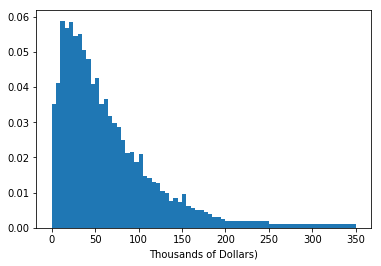

In [11]:
# PART A
# plot histogram
data = pd.read_csv('usincmoms.txt', delimiter ='\t', header = None, names = ['percent', 'midpoint'])
data1 = data.percent.copy()
data1[41] = data.percent[41].copy() / 20
data1[40] = data.percent[40].copy() / 10
widths = np.ones(42) * 5
widths[41] = 100
widths[40] = 50
plt.xlabel("Thousands of Dollars)")
plt.bar(data.midpoint/1000, data1, width = widths)
plt.show()

/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


      fun: 0.04594528252900247
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.84708973e-07, -2.35714226e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 270
      nit: 14
   status: 0
  success: True
        x: array([10.76684402,  0.90784063])


/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


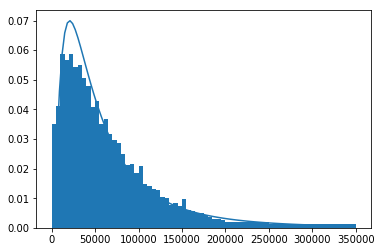

In [12]:
# PART B
# set parameters
weight = np.diag(data.percent)
μ_0 = 4.0
σ_0 = 1.0
p_0 = np.array([μ_0, σ_0])
gmm_0 = (data.percent, weight)
bins = np.zeros(42)
bins[0] = 5000.0
for i in range(1, 40):
    bins[i] = (data.midpoint[i] + data.midpoint[i + 1]) / 2
bins[39] = 200000.0
bins[40] = 250000.0
bins[41] = np.inf
# function that finds percent of households, model moments
def mm(μ, σ):
    dist1 = stats.norm.cdf(np.log(bins), μ, σ)
    bins2 = np.roll(bins, 1)
    bins2[0] = 0
    dist2 = stats.norm.cdf(np.log(bins2), μ, σ)
    return dist1 - dist2
# function that finds moment errors
def err(dist, μ, σ):
    err = (mm(μ, σ) - dist) / dist
    return err
# function that finds GMM
def gmm(params, *args):
    μ, σ = params
    dist, weight = args
    errors = err(dist, μ, σ)
    return np.dot(np.dot(errors.T, weight), errors)
results = opt.minimize(gmm, p_0, args = (gmm_0), method = 'L-BFGS-B', bounds = ((0, None), (0, None)))
μ, σ = results.x
print(results)
def ln_dist(x, μ, σ):
    return (1 / (x * σ * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - μ) ** 2 /(2 * σ ** 2)))
x = np.linspace(0, 300000, 100)
plt.bar(data.midpoint, data1, width = widths * 1000)
plt.plot(x, 5000 * ln_dist(x, μ, σ))
plt.show()

      fun: 0.04400238641398765
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.17037801e-05, -2.08166817e-09])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 114
      nit: 28
   status: 0
  success: True
        x: array([1.42443601e+00, 4.50546664e+04])


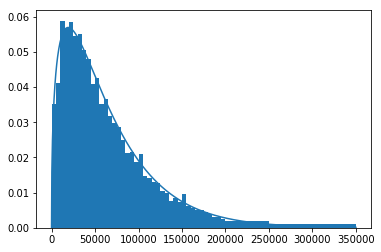

In [13]:
# PART C
# set parameters
α_0 = 3.0
β_0 = 20000
p_0 = np.array([α_0, β_0])
gmm_0 = (data.percent, weight)
def ga_mm(x, α, β): 
    return 5000 * (1 / ((β ** α) * math.gamma(α)) * (x ** (α - 1)) * np.exp(-x / β))
def ga_err(α, β, percent, simple = False):
    modelpercent = ga_mm(data.midpoint, α, β)
    if simple:
        err = modelpercent - percent
    else:
        err = (modelpercent - percent) / percent
    return err
def ga(params, *args):
    α, β = params
    percent, weight = args
    errors = ga_err(α, β, percent)
    return np.dot(np.dot(errors.T, weight), errors)
results = opt.minimize(ga, p_0, args = (gmm_0), method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
α, β = results.x
print(results)
x = np.linspace(0.000001, 350000, 1000)
y = ga_mm(x, α, β)
plt.bar(data.midpoint, data1, width = widths * 1000)
plt.plot(x, y)
plt.show()

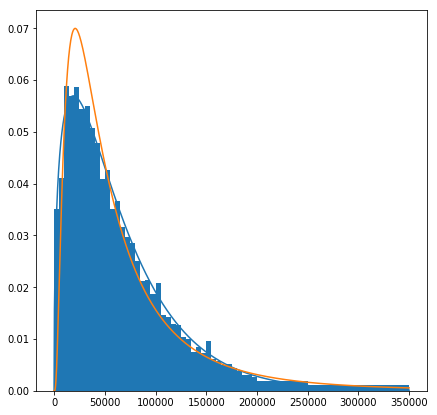

In [14]:
# PART D
plt.subplots(figsize=(7, 7))
plt.bar(data.midpoint, data1, width = widths * 1000)
plt.plot(x, y)
plt.plot(x, 5000 * ln_dist(x, μ, σ))
plt.show()

In [20]:
# PART E
# set parameters
gmm_0 = (data.percent, np.eye(42))
results1 = opt.minimize(ga, p_0, args=(gmm_0), method='L-BFGS-B', bounds = ((1e-8, None), (1e-8, None)))
α1, β1 = results1.x
weight = (1 / 42) * np.dot((ga_err(α_0, β_0, data.percent),(ga_err(α_0, β_0, data.percent))))
# set parameters
gmm_0 = (data.perc, weight)
results2 = opt.minimize(ga, p_0, args=(gmm_0), method='L-BFGS-B', bounds = ((1e-8, None), (1e-8, None)))
α2, β2 = results2.x
print(results1)
print(results2)
print(α1, α2, β1, β2)

AttributeError: 'DataFrame' object has no attribute 'percent'

EXERCISE 4

In [19]:
# PART A
data = pd.read_csv('MacroSeries.txt', header = None, names = ['c_t', 'k_t', 'w_t', 'r_t', 'y_t'])
# set parameters
weight = np.eye(4)
α_0 = 0.1
β_0 = 0.2
ρ_0 = 0.2
μ_0 = 5.0
p_0 = np.array([α_0, β_0, ρ_0, μ_0])
gmm_0 = (data.w_t, data.k_t, data.c_t, data.r_t, weight)
def gmm_err(α, β, ρ, μ, w, k, c_t, r_t):
    z = np.log(w / ((1 - α) * k ** α))
    ztp1 = np.roll(z, 1)
    rtp1 = np.roll(r_t, 1)
    ctp1 = np.roll(c_t, 1)
    ktp1 = np.roll(k, 1)
    err1 = ztp1 - ρ * z - (1 - ρ) * μ
    err1[0] = 0
    err2 = (ztp1 - ρ * z - (1 - ρ) * μ) * z
    err2[0] = 0
    err3 = β * α * np.exp(ztp1) * (ktp1 ** (α - 1)) * c_t / ctp1 - 1
    err3[0] = 0
    err4 = (β * α * np.exp(ztp1) * (ktp1 ** (α - 1)) * c_t / ctp1 - 1) * w
    err4[0] = 0
    results = np.array([err1.mean(), err2.mean(), err3.mean(), err4.mean()])
    return results
def gmm(params, *args):
    α, β, ρ, μ = params
    w, k, c_t, r_t, weight = args
    errors = gmm_err(α, β, ρ, μ, w, k, c_t, r_t)
    return np.dot(np.dot(errors.T, weight), errors)
results = opt.minimize(gmm, p_0, args = (gmm_0), method = 'L-BFGS-B',bounds = ((0, 1), (0, 1), (-1, 1), (0, None)))
print(results)

      fun: 471.6600590097744
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.01177363e+07,  9.69125888e+05, -1.17763520e+03, -2.86920232e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 280
      nit: 8
   status: 0
  success: True
        x: array([0.54184838, 0.5923254 , 0.2       , 5.0000009 ])
